In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

upload the json file which to be downloaded from the kaggle account

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abrarrafidnoor","key":"e7089938bbdc3527304bb6f5ac7f7c88"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

now go to Kaggle

1.   go to the project
2.   click the 3 dots beside download
3.   click on "Copy API command"
4.   paste in the below cell and put a "!" in the beginning



json file needs to named as "kaggle.json"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research


 99% 564M/572M [00:03<00:00, 156MB/s]
100% 572M/572M [00:03<00:00, 160MB/s]


unzip the zipped...

In [ ]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

checking the directory and knowing how many images are in each directory

In [ ]:
for dirpath, dirname, filename in os.walk("/content/COVID_IEEE"):
  print(f"There are {len(dirname)} directory, {len(filename)} images in {dirpath}.")

There are 3 directory, 0 images in /content/COVID_IEEE.
There are 0 directory, 668 images in /content/COVID_IEEE/normal.
There are 0 directory, 536 images in /content/COVID_IEEE/covid.
There are 0 directory, 619 images in /content/COVID_IEEE/virus.


getting the name of the classes

In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_name = np.array([sorted([item.name for item in data_dir.glob("*")])])
class_name

array([['covid', 'normal', 'virus']], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img, cmap='gray')
  plt.title(target_class)
  plt.axis("off")

  return img 

['person672_virus_1261.jpeg']


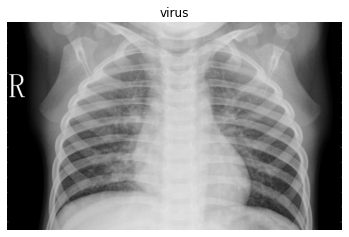

In [ ]:
img = view_image("/content/COVID_IEEE/", "virus")

['F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg']


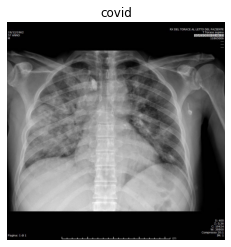

In [ ]:
img = view_image("/content/COVID_IEEE/", "covid")

['NORMAL2-IM-0529-0001.jpeg']


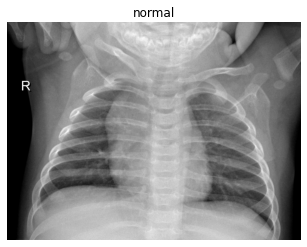

In [ ]:
img = view_image("/content/COVID_IEEE/", "normal")

In [ ]:
data = []
labels = []

covid = os.listdir("/content/COVID_IEEE/covid/")

for i in covid:
  image = cv2.imread("/content/COVID_IEEE/covid/"+i)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append(0)

In [ ]:
normal = os.listdir("/content/COVID_IEEE/normal/")

for i in normal:
  image = cv2.imread("/content/COVID_IEEE/normal/"+i)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append(1)

In [ ]:
virus = os.listdir("/content/COVID_IEEE/virus/")

for i in virus:
  image = cv2.imread("/content/COVID_IEEE/virus/"+i)
  image = cv2.resize(image, (224, 224))
  data.append(image)
  labels.append(2)

In [ ]:
img_data = np.array(data)/255.0
img_labels = np.array(labels)

In [ ]:
img_data

In [ ]:
img_labels

array([0, 0, 0, ..., 2, 2, 2])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_data, img_labels, test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Model Building

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128, padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))

model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 21s 249ms/step - loss: 0.8654 - accuracy: 0.5892 - val_loss: 0.5081 - val_accuracy: 0.8037
Epoch 2/15
32/32 [==============================] - 5s 145ms/step - loss: 0.3650 - accuracy: 0.8696 - val_loss: 0.3421 - val_accuracy: 0.8676
Epoch 3/15
32/32 [==============================] - 5s 145ms/step - loss: 0.3035 - accuracy: 0.8931 - val_loss: 0.3399 - val_accuracy: 0.9064
Epoch 4/15
32/32 [==============================] - 5s 145ms/step - loss: 0.2250 - accuracy: 0.9255 - val_loss: 0.2645 - val_accuracy: 0.9178
Epoch 5/15
32/32 [==============================] - 5s 145ms/step - loss: 0.1510 - accuracy: 0.9471 - val_loss: 0.2654 - val_accuracy: 0.9018
Epoch 6/15
32/32 [==============================] - 5s 146ms/step - loss: 0.1408 - accuracy: 0.9569 - val_loss: 0.4143 - val_accuracy: 0.8790
Epoch 7/15
32/32 [==============================] - 5s 146ms/step - loss: 0.1080 - accuracy: 0.9637 - val_loss: 0.2363 - val_accuracy: 0.9224
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

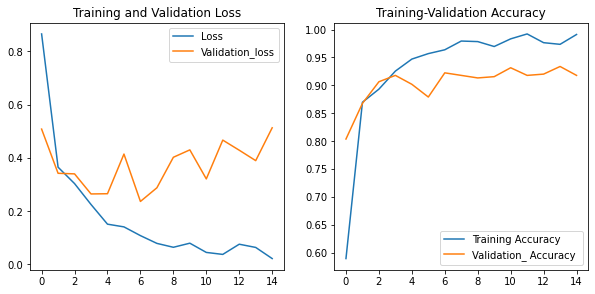

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
prediction = model.predict(X_test)

In [ ]:
y_pred = np.argmax(prediction, axis=1)
y_test_new = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       108
           1       0.95      0.90      0.92       142
           2       0.92      0.96      0.94       115

    accuracy                           0.93       365
   macro avg       0.93      0.93      0.93       365
weighted avg       0.93      0.93      0.93       365



In [ ]:
print(confusion_matrix(y_test_new, y_pred))

[[102   3   3]
 [  7 128   7]
 [  1   4 110]]


In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns=["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,102,3,3
normal,7,128,7
virus,1,4,110


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Transfer Learning

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [ ]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 17s 118ms/step - loss: 13.5359 - accuracy: 0.7255 - val_loss: 1.2736 - val_accuracy: 0.8995
Epoch 2/15
32/32 [==============================] - 2s 64ms/step - loss: 0.9649 - accuracy: 0.9451 - val_loss: 0.6208 - val_accuracy: 0.9543
Epoch 3/15
32/32 [==============================] - 2s 72ms/step - loss: 0.2213 - accuracy: 0.9745 - val_loss: 0.5244 - val_accuracy: 0.9475
Epoch 4/15
32/32 [==============================] - 2s 73ms/step - loss: 0.1971 - accuracy: 0.9794 - val_loss: 0.4113 - val_accuracy: 0.9566
Epoch 5/15
32/32 [==============================] - 2s 65ms/step - loss: 0.0521 - accuracy: 0.9902 - val_loss: 0.3500 - val_accuracy: 0.9543
Epoch 6/15
32/32 [==============================] - 2s 65ms/step - loss: 0.0459 - accuracy: 0.9931 - val_loss: 0.4298 - val_accuracy: 0.9658
Epoch 7/15
32/32 [==============================] - 2s 75ms/step - loss: 0.0353 - accuracy: 0.9961 - val_loss: 0.4373 - val_accuracy: 0.9498
Epoch 8/15

Text(0.5, 1.0, 'Training-Validation Accuracy')

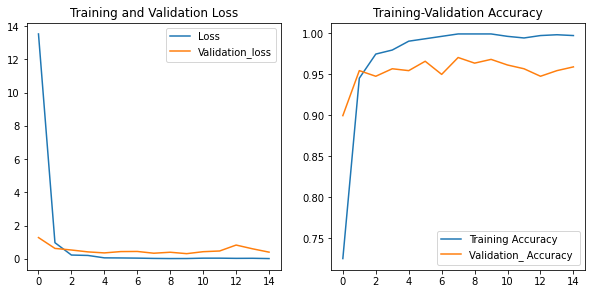

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,106,2,0
normal,1,126,2
virus,1,9,118
